In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
import PsnrSnr as p
import kmeansAlgo
from sklearn.utils import shuffle

<IPython.core.display.Javascript object>

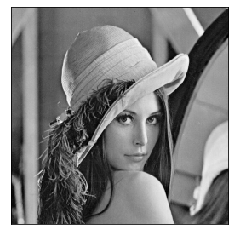

<IPython.core.display.Javascript object>

In [3]:
img = cv.imread("lena_gray.jpg", 0)
size=256
window=4
img = cv.resize(img, dsize=(size, size)) 
width=img.shape[0]
height=img.shape[1]

plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


In [4]:
i = 0
j = 0
luv = []

for h in range(int(width / window)):
    j = 0
    for k in range(int(height / window)):
        luv.append(
            [
                img[i, j],
                img[i, j + 1],
                img[i, j + 2],
                img[i, j + 3],
                img[i + 1, j],
                img[i + 1, j + 1],
                img[i + 1, j + 2],
                img[i + 1, j + 3],
                img[i + 2, j],
                img[i + 2, j + 1],
                img[i + 2, j + 2],
                img[i + 2, j + 3],
                img[i + 3, j],
                img[i + 3, j + 1],
                img[i + 3, j + 2],
                img[i + 3, j + 3],
            ]
        )
        j = j + 4
    i = i + 4
x = np.array(luv)

<IPython.core.display.Javascript object>

In [5]:
# temp = np.mean(luv, axis=1)
# luvtemp = np.array(luv.copy())

# for i in range(luvtemp.shape[0]):
#     luvtemp[i, :] = temp[i]

# x = luvtemp

<IPython.core.display.Javascript object>

In [6]:
import time as t

cluster = 36

clusterssize = [cluster]  # 2, 3, 4, 5, 6, 7, 8, 9,
timearray = []
error = []
segementedImg = []

<IPython.core.display.Javascript object>

In [7]:
def generateRandomCenters(c, x):
    centers = []
    _min = np.min(x)
    _max = np.max(x)

    #     index = np.random.randint(0, x.shape[0])
    #     t = x[index - 1, :]

    t = np.min(x, axis=0)
    for i in range(c):
        centers.append(t + 1e-5 * i)
    return np.asarray(centers)

<IPython.core.display.Javascript object>

In [8]:
for i in clusterssize:

    start = t.time()
    kmeans = kmeansAlgo.Kmeans(n_clusters=i, random_state=13, max_iter=50)
    kmeans.centroids = generateRandomCenters(cluster, x)
    kmeans.fit(x)

    timearray.append(t.time() - start)

    segementedImg.append(kmeans.labels)

    pic2show = kmeans.centroids
    print(timearray)

[0.3962411880493164]


<IPython.core.display.Javascript object>

In [9]:
lables = np.array(kmeans.labels)
print(np.array(kmeans.labels).shape)
print(kmeans.centroids.shape)

clustercenters = (kmeans.centroids).reshape(cluster, 16)
centersp = (kmeans.centroids).reshape(cluster, 16)
centersp.shape

(4096,)
(36, 16)


(36, 16)

<IPython.core.display.Javascript object>

In [10]:
finalval = []
for i in range(lables.shape[0]):
    finalval.append(centersp[lables[i]])

finalval = np.array(finalval).reshape(int(width / 4), int(height / 4), 16)

<IPython.core.display.Javascript object>

In [11]:
finalval.shape

(64, 64, 16)

<IPython.core.display.Javascript object>

In [12]:
# pd.DataFrame(kmeans.cluster_centers_[kmeans.labels_])

<IPython.core.display.Javascript object>

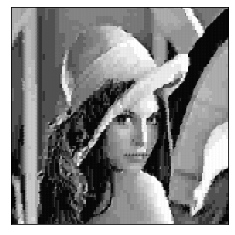

<IPython.core.display.Javascript object>

In [13]:
# convert back the clustered image to the original form
# decoding

temp = np.zeros((width, height))
i = 0
j = 0
for h in range(int(width / 4)):
    j = 0
    for k in range(int(height / 4)):
        val = finalval

        temp[i, j] = val[h][k][0]
        temp[i, j + 1] = val[h][k][1]
        temp[i, j + 2] = val[h][k][2]
        temp[i, j + 3] = val[h][k][3]
        temp[i + 1, j] = val[h][k][4]
        temp[i + 1, j + 1] = val[h][k][5]
        temp[i + 1, j + 2] = val[h][k][6]
        temp[i + 1, j + 3] = val[h][k][7]
        temp[i + 2, j] = val[h][k][8]
        temp[i + 2, j + 1] = val[h][k][9]
        temp[i + 2, j + 2] = val[h][k][10]
        temp[i + 2, j + 3] = val[h][k][11]
        temp[i + 3, j] = val[h][k][12]
        temp[i + 3, j + 1] = val[h][k][13]
        temp[i + 3, j + 2] = val[h][k][14]
        temp[i + 3, j + 3] = val[h][k][15]

        j = j + 4
    i = i + 4

plt.imshow(temp, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.savefig("Kmeans_SegementdIMg_" + str(cluster) + ".jpg")
plt.show()

In [14]:
val[h][k].shape

(16,)

<IPython.core.display.Javascript object>

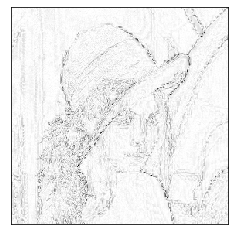

<IPython.core.display.Javascript object>

In [15]:
plt.imshow(256 - abs(img - temp), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.savefig("Kmeans_SegementdIMg_error_" + str(cluster) + ".jpg")
plt.show()

In [16]:
psnr = p.psnr(np.array(img).astype(int), np.array(temp).astype(int))
psnr

25.232634858257917

<IPython.core.display.Javascript object>

In [17]:
snr = p.snr(np.array(img).astype(int), np.array(temp).astype(int))
snr

12.14412506129154

<IPython.core.display.Javascript object>